#### IMPORTING LIBRARIES

In [1]:
# For Reading Data
import pandas as pd 
import numpy as np 

# For Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

#warning 
import warnings
warnings. simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing utils
import sys

sys.path.append('..')
from utils.cleanning import CleanData
from utils.DataGroupby import advanced_groupby

{'Apple': ['Apple iPad (A1823)', 'Apple iPad (A1954)', 'Apple iPad 2 (A1396)', 'Apple iPad 3 (A1430)', 'Apple iPad 4 (A1460)'], 'Samsung': ['Samsung 2018 Galaxy J4', 'Samsung Galaxy A3 (Sm-A300X)', 'Samsung Galaxy A3 (Sm-A310X)', 'Samsung Galaxy A3 (Sm-A320)', 'Samsung Galaxy A5 (Sm-A500X)'], 'Huawei': ['Huawei Ale-Ul00', 'Huawei Ascend G6', 'Huawei Ascend G620S', 'Huawei Ascend Mate7', 'Huawei Ascend P7']}


#### READING DATA AN CSV  FILE

In [3]:
df = pd.read_csv("E:/10 academy/Task/Week 1/TellcoAnalysis/Data/Week1_challenge_data_source.csv")

In [4]:
df.head()
#this will print first five row of data 

Bearer Id            Start  Start ms              End  End ms  \
0  1.311450e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311450e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311450e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311450e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311450e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.082010e+14   3.366496e+10  3.552120e+13        9.16457E+15   
1  1365104.0  2.082020e+14   3.368185e+10  3.579400e+13            L77566A   
2  1361762.0  2.082000e+14   3.376063e+10  3.528150e+13            D42335A   
3  1321509.0  2.082010e+14   3.375034e+10  3.535660e+13            T21824A   
4  1089009.0  2.082010e+14   3.369980e+10  3.540700e+13            D88865A   

   ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  ...          15854611.0           2501332.0           8198936.0   
1  ...          20247395.0          19111729.0          18338413.0   
2  ...          19725661.0          14699576.0          17587794.0   
3  ...          21388122.0          15146643.0          13994646.0   
4  ...          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

#### DATA ANALYSIS 

In [5]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [6]:
df.shape

(150001, 55)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

##### cleaning the data and dealing with null values

In [9]:
# cleaning the data and dealing with null values

# drop all null values with column null count less that 10
data= CleanData(df)
data.drop_rows(drop_in_columns=['Start','Start ms','End','End ms','Dur. (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','Activity Duration DL (ms)','Activity Duration UL (ms)','Total UL (Bytes)','Dur. (ms).1','Total DL (Bytes)'])

# drop all rows with null that cant be replaced by mean
data.drop_rows(drop_in_columns=['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer','Handset Type'])

# fill columns with mean with null less or about 1000
data.fill_with_mean(fill_columns=['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'])

# additional fill with mean
data.fill_with_mean(fill_columns=['Avg RTT DL (ms)','Avg RTT UL (ms)'])

# fill tcp with mode
data.fill_with_mode(fill_columns=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])

# drop columns with more than 50% null
data.drop_unwanted_column(unwanted_columns=['HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'])

 Authomatic action.!!!


Bearer Id            Start  Start ms              End  End ms  \
0       1.311450e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311450e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311450e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311450e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311450e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149995  1.304240e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   
149996  7.277830e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349880e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311450e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311450e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082010e+14   3.366496e+10  3.552120e+13   
1       1365104.0  2.082020e+14   3.368185e+10  3.579400e+13   
2       1361762.0  2.082000e+14   3.376063e+10  3.528150e+13   
3       1321509.0  2.082010e+14   3.375034e+10  3.535660e+13   
4       1089009.0  2.082010e+14   3.369980e+10  3.540700e+13   
...           ...           ...            ...           ...   
149995    59587.0  2.082010e+14   3.366865e+10  3.533250e+13   
149996    81230.0  2.082020e+14   3.365069e+10  3.548310e+13   
149997    97970.0  2.082020e+14   3.366345e+10  3.566050e+13   
149998    98249.0  2.082020e+14   3.362189e+10  3.572120e+13   
149999    97910.0  2.082020e+14   3.361962e+10  8.618620e+13   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0             9.16457E+15  ...          15854611.0           2501332.0   
1                 L77566A  ...          20247395.0          19111729.0   
2                 D42335A  ...          19725661.0          14699576.0   
3                 T21824A  ...          21388122.0          15146643.0   
4                 D88865A  ...          15259380.0          18962873.0   
...                   ...  ...                 ...                 ...   
149995            T85721A  ...           6550499.0          18003146.0   
149996            D20434A  ...          16191667.0          11763428.0   
149997            D10223C  ...          13877234.0           8288284.0   
149998            T51102A  ...          22660510.0           1855903.0   
149999            L88342B  ...           8817106.0           8305402.0   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0                8198936.0           9656251.0        278082303.0   
1               18338413.0          17227132.0        608750074.0   
2               17587794.0           6163408.0        229584621.0   
3               13994646.0           1097942.0        799538153.0   
4               17124581.0            415218.0        527707248.0   
...                    ...                 ...                ...   
149995          22468983.0           7149728.0        784435351.0   
149996          17883703.0          19678161.0        526609673.0   
149997          19350146.0          21293148.0        626893062.0   
149998           9963942.0           5065760.0        553539484.0   
149999           3322253.0          13172589.0        352536971.0   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0              14344150.0       171744450.0         8814393.0   
1               1170709.0       526904238.0        15055145.0   
2                395630.0       410692588.0         4215763.0   
3              10849722.0       749039933.0        12797283.0   
4               3529801.0       550709500.0        13910322.0   
...                   ...               ...               ...   
149995         12724751.0       321383162.0        14890486.0   
149996          9197207.0         3264510.0        13487416.0   
149997          4735033.0 

In [10]:
data.df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       0
TCP UL Retrans. Vol (Bytes)       0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer        

In [11]:
clean_data = data.df
clean_data.head(2)

Bearer Id           Start  Start ms              End  End ms  Dur. (ms)  \
0  1.311450e+19  4/4/2019 12:01     770.0  4/25/2019 14:35   662.0  1823652.0   
1  1.311450e+19  4/9/2019 13:04     235.0   4/25/2019 8:15   606.0  1365104.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
0  2.082010e+14   3.366496e+10  3.552120e+13        9.16457E+15  ...   
1  2.082020e+14   3.368185e+10  3.579400e+13            L77566A  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2501332.0           8198936.0   
1          20247395.0          19111729.0          18338413.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  

[2 rows x 47 columns]

In [12]:
clean_data.shape

(148346, 47)

In [13]:
clean_data.describe()

Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.483460e+05  148346.000000  148346.000000  1.483460e+05  1.483460e+05   
mean   1.014659e+19     499.218934     498.624344  1.051294e+05  2.082017e+14   
std    2.893242e+18     288.559368     288.076442  8.101836e+04  1.525929e+10   
min    6.917540e+18       0.000000       0.000000  7.142000e+03  2.040470e+14   
25%    7.349880e+18     250.000000     251.000000  5.837400e+04  2.082010e+14   
50%    7.349880e+18     499.000000     500.000000  8.639900e+04  2.082020e+14   
75%    1.304240e+19     749.000000     749.000000  1.329658e+05  2.082020e+14   
max    1.318650e+19     999.000000     999.000000  1.859336e+06  2.082520e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.483460e+05  1.483460e+05    148346.000000    148346.000000   
mean    4.191542e+10  4.849938e+13       105.958376        17.633438   
std     2.452297e+12  2.242914e+13       528.567112        76.507674   
min     3.360100e+10  4.400150e+11         0.000000         0.000000   
25%     3.365131e+10  3.546075e+13        35.000000         3.000000   
50%     3.366371e+10  3.572230e+13        54.000000         7.000000   
75%     3.368352e+10  8.611970e+13       105.958376        17.633438   
max     8.823970e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count            148346.000000  ...        1.483460e+05        1.483460e+05   
mean              13290.626421  ...        1.163445e+07        1.100857e+07   
std               23998.929567  ...        6.711222e+06        6.345554e+06   
min                   0.000000  ...        5.300000e+01        1.050000e+02   
25%                  43.000000  ...        5.833526e+06        5.515832e+06   
50%                  63.000000  ...        1.161727e+07        1.101197e+07   
75%               19703.750000  ...        1.744639e+07        1.651463e+07   
max              378160.000000  ...        2.325910e+07        2.201196e+07   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count        1.483460e+05        1.483460e+05       1.483460e+05   
mean         1.162748e+07        1.100187e+07       4.220992e+08   
std          6.725235e+06        6.358185e+06       2.440025e+08   
min          4.200000e+01        3.500000e+01       2.516000e+03   
25%          5.778898e+06        5.476158e+06       2.105496e+08   
50%          1.164286e+07        1.099907e+07       4.235369e+08   
75%          1.747121e+07        1.650450e+07       6.332978e+08   
max          2.325919e+07        2.201196e+07       8.434419e+08   

       Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
count       1.483460e+05      1.483460e+05      1.483460e+05   
mean        8.290269e+06      4.211656e+08      8.262890e+06   
std         4.781597e+06      2.431682e+08      4.769352e+06   
min         5.900000e+01      3.290000e+03      1.480000e+02   
25%         4.132224e+06      2.102759e+08      4.143476e+06   
50%         8.293466e+06      4.218711e+08      8.265908e+06   
75%         1.243214e+07      6.316517e+08      1.238236e+07   
max         1.655879e+07      8.434425e+08      1.655882e+07   

       Total UL (Bytes)  Total DL (Bytes)  
count      1.483460e+05      1.483460e+05  
mean       4.112015e+07      4.546996e+08  
std        1.127958e+07      2.441771e+08  
min        2.866892e+06      7.114041e+06  
25%        3.321763e+07      2.431725e+08  
50%        4.114375e+07      4.560177e+08  
75%        4.903338e+07      6.657654e+08  
max        7.833131e+07      9.029696e+08  

[8 rows x 42 columns]

In [14]:
# saving clean data dataset
clean_data.to_csv('../Data/clean_data.csv')

In [15]:
clean_data.shape

(148346, 47)

In [16]:
SmplData = clean_data[:6000]

In [17]:
def plot_relations(dataset, main):
    # plot Google UL (Bytes) to number if xdr sessions, session duration, total download and upload
    title = str(main)+' vs variables'
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,4,1)
    sns.scatterplot(data=dataset[['Dur. (ms).1',main]], x='Dur. (ms).1', y=main)

    plt.subplot(1,4,2)
    sns.scatterplot(data=dataset[['Dur. (ms)',main]], x='Dur. (ms)', y=main)

    plt.subplot(1,4,3)
    sns.scatterplot(data=dataset[['Total DL (Bytes)',main]], x='Total DL (Bytes)', y=main)

    plt.subplot(1,4,4)
    sns.scatterplot(data=dataset[['Total UL (Bytes)',main]], x='Total UL (Bytes)', y=main)
    
    plt.suptitle(title)
    plt.show()

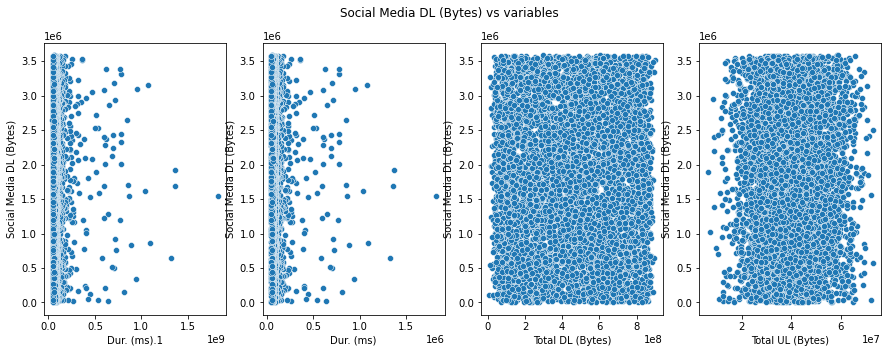

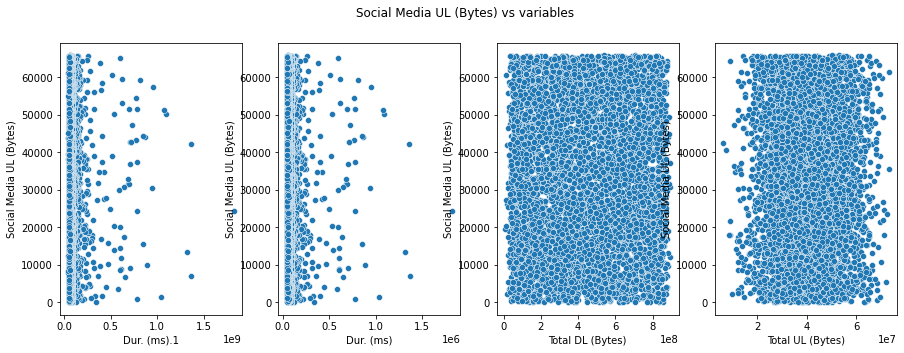

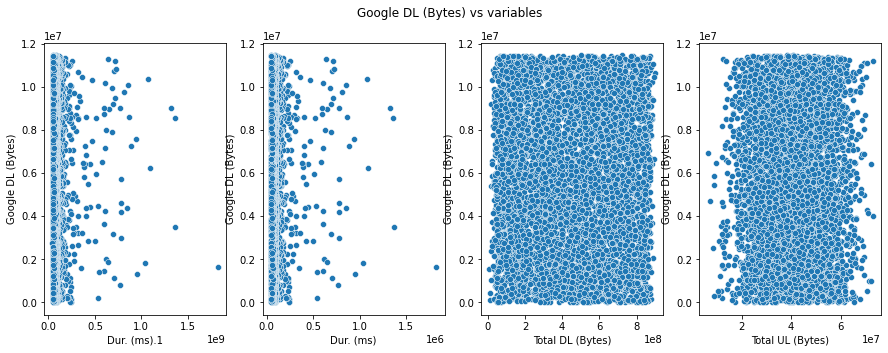

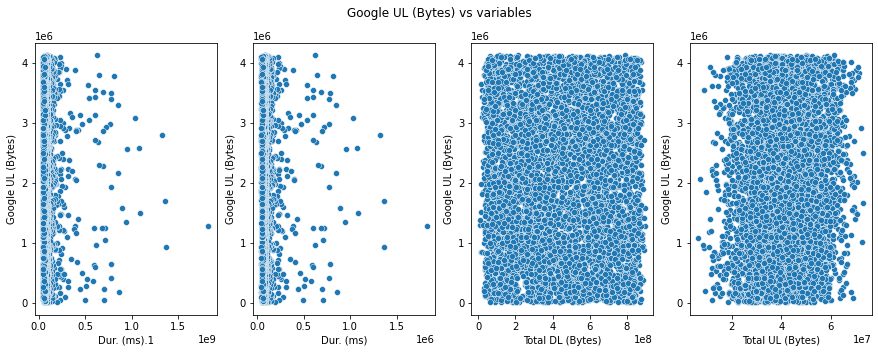

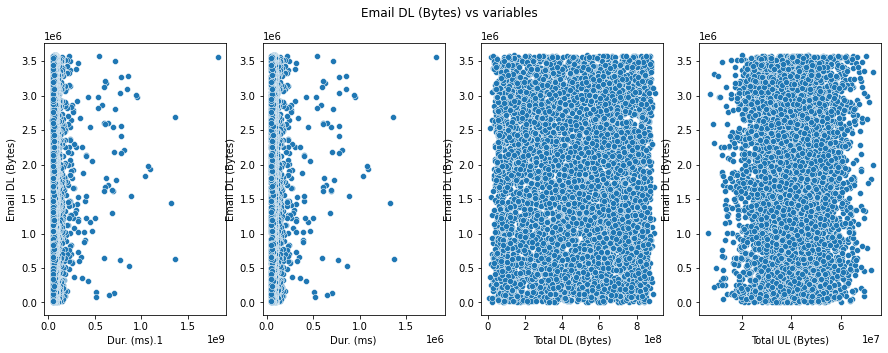

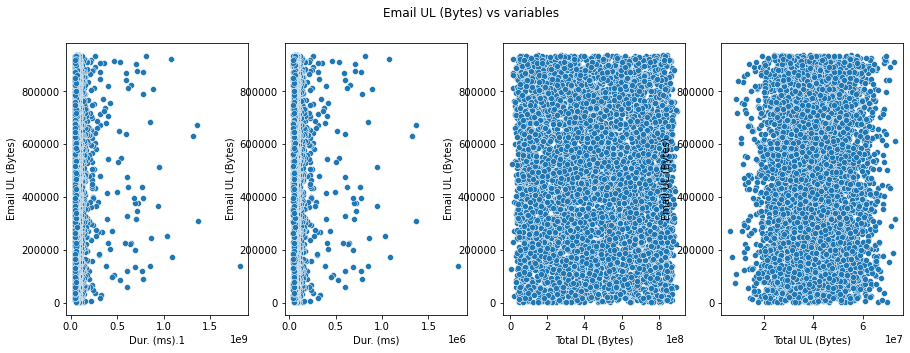

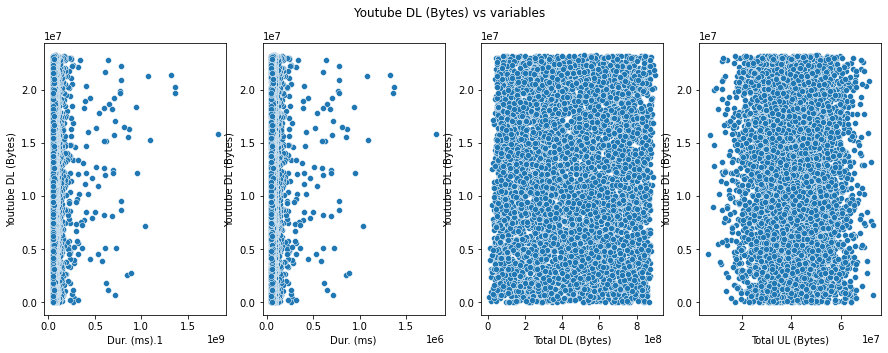

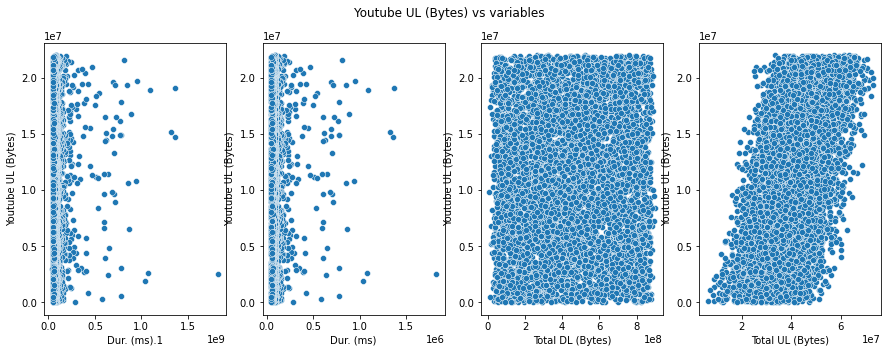

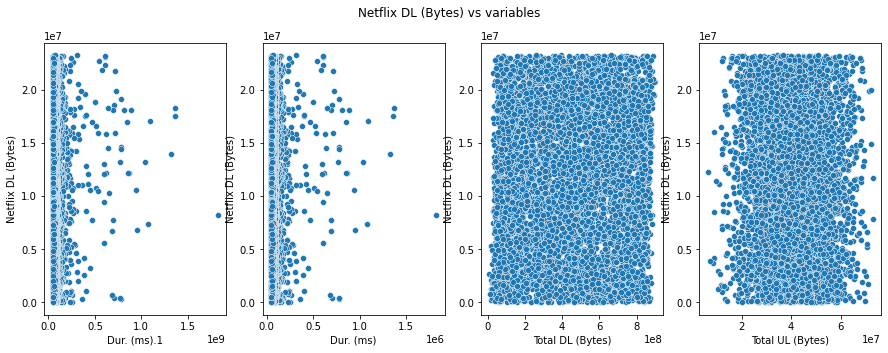

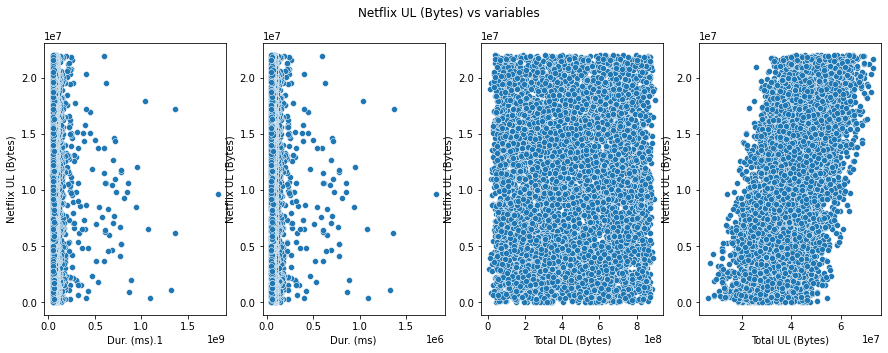

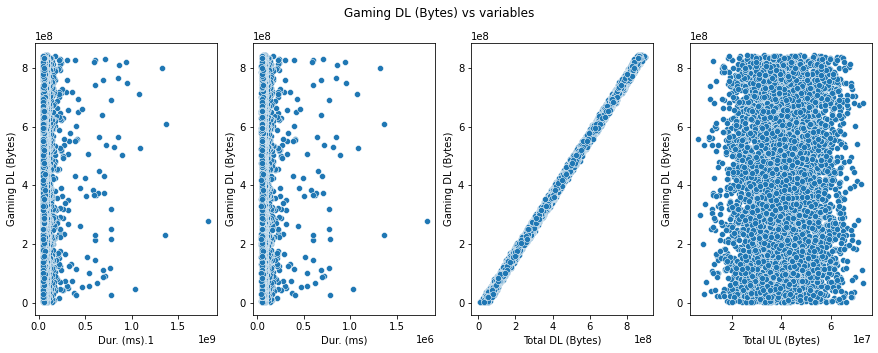

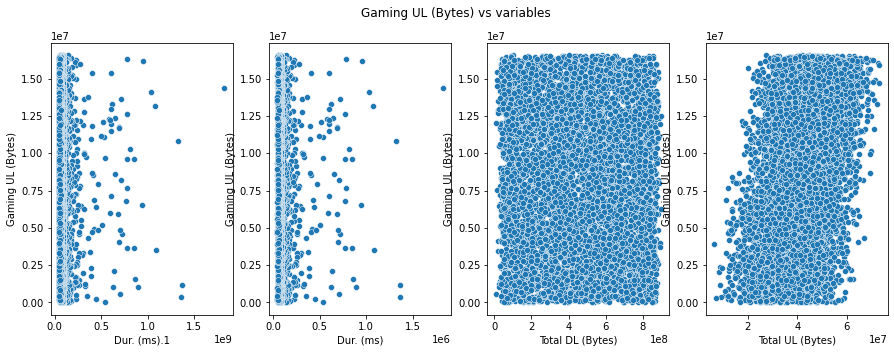

In [18]:
plot_list = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)']
for figure in plot_list:
    main = figure
    plot_relations(SmplData[['Dur. (ms).1','Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)',main]], main)

In [19]:
variables = ['Dur. (ms).1','Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)']
clean_data[variables].describe()

Dur. (ms).1     Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)
count  1.483460e+05  1.483460e+05      1.483460e+05      1.483460e+05
mean   1.051299e+08  1.051294e+05      4.546996e+08      4.112015e+07
std    8.101835e+07  8.101836e+04      2.441771e+08      1.127958e+07
min    7.142988e+06  7.142000e+03      7.114041e+06      2.866892e+06
25%    5.837439e+07  5.837400e+04      2.431725e+08      3.321763e+07
50%    8.639999e+07  8.639900e+04      4.560177e+08      4.114375e+07
75%    1.329664e+08  1.329658e+05      6.657654e+08      4.903338e+07
max    1.859336e+09  1.859336e+06      9.029696e+08      7.833131e+07

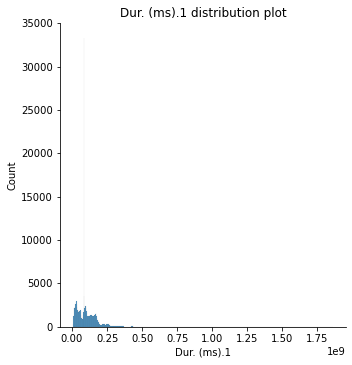

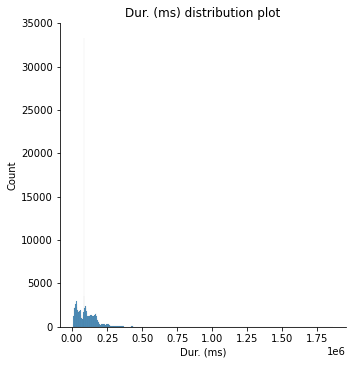

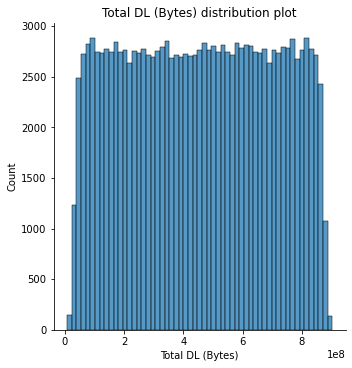

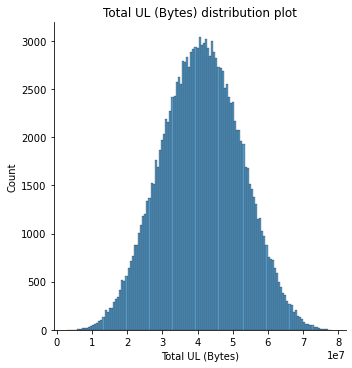

In [20]:
# distribution plot
for plot in variables:
    sns.displot(clean_data, x=plot).set(title=plot+" distribution plot")
    plt.show()

### Task 1 - User Overview analysis 

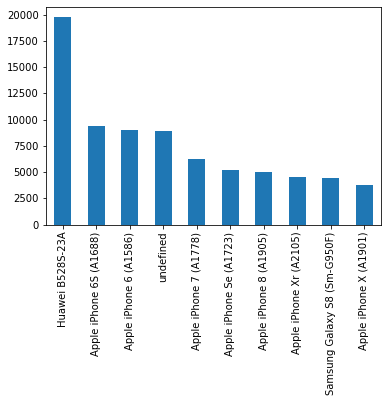

In [21]:
#the top 10 handsets used by the customers.
clean_data['Handset Type'].value_counts()[:10].plot(kind='bar')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

<AxesSubplot:>

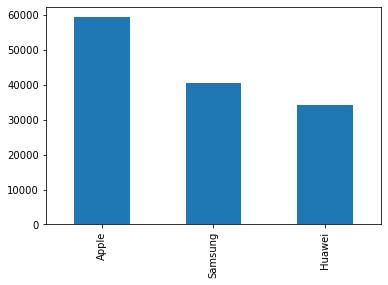

In [22]:
#top 3 handset manufacturers 
clean_data['Handset Manufacturer'].value_counts()[:3].plot(kind='bar')

In [23]:
# the top 5 handsets per top 3 handset manufacturer
advanced_groupby(clean_data,'Handset Manufacturer','Handset Type',3,5)

{'Apple': ['Apple iPad (A1823)',
  'Apple iPad (A1954)',
  'Apple iPad 2 (A1396)',
  'Apple iPad 3 (A1430)',
  'Apple iPad 4 (A1460)'],
 'Samsung': ['Samsung 2018 Galaxy J4',
  'Samsung Galaxy A3 (Sm-A300X)',
  'Samsung Galaxy A3 (Sm-A310X)',
  'Samsung Galaxy A3 (Sm-A320)',
  'Samsung Galaxy A5 (Sm-A500X)'],
 'Huawei': ['Huawei Ale-Ul00',
  'Huawei Ascend G6',
  'Huawei Ascend G620S',
  'Huawei Ascend Mate7',
  'Huawei Ascend P7']}

#### TASK 1.1 

In [24]:
# getting all user data
columns_all_user_data = clean_data.columns
all_user_data = clean_data.groupby(['MSISDN/Number'])[columns_all_user_data].agg('sum')
all_user_data.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL

In [25]:
user_handset_groups = clean_data.groupby(['MSISDN/Number','Handset Manufacturer','Handset Type'])[columns_all_user_data].agg(['sum'])

In [26]:
# task 1.1
information = ['Dur. (ms).1','Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)','Social Media DL (Bytes)', 'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)']
user_data = clean_data.groupby(['MSISDN/Number'])[information].agg(['sum'])
user_data.head(2)

Dur. (ms).1 Dur. (ms) Total DL (Bytes) Total UL (Bytes)  \
                       sum       sum              sum              sum   
MSISDN/Number                                                            
3.360100e+10   116720140.0  116720.0      842637466.0       36053108.0   
3.360100e+10   181230963.0  181230.0      120755184.0       36104459.0   

              Social Media DL (Bytes) Social Media UL (Bytes)  \
                                  sum                     sum   
MSISDN/Number                                                   
3.360100e+10                2206504.0                 25631.0   
3.360100e+10                2598548.0                 62017.0   

              Google DL (Bytes) Google UL (Bytes) Email DL (Bytes)  \
                            sum               sum              sum   
MSISDN/Number                                                        
3.360100e+10          3337123.0         1051882.0         837400.0   
3.360100e+10          4197697.0         1137166.0        2828821.0   

              Email UL (Bytes) Youtube DL (Bytes) Youtube UL (Bytes)  \
                           sum                sum                sum   
MSISDN/Number                                                          
3.360100e+10          493962.0         14900201.0          6724347.0   
3.360100e+10          478960.0          5324251.0          7107972.0   

              Netflix DL (Bytes) Netflix UL (Bytes) Gaming DL (Bytes)  \
                             sum                sum               sum   
MSISDN/Number                                                           
3.360100e+10          10265105.0         16915876.0       811091133.0   
3.360100e+10            770569.0         10451194.0       105035298.0   

              Gaming UL (Bytes)  
                            sum  
MSISDN/Number                    
3.360100e+10          1367528.0  
3.360100e+10         14714780.0

#### TASK 1.2

In [27]:
#Describe all  relevant variables and associated data types (slide). 
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106352 entries, 33601001722.0 to 882397000000000.0
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   (Dur. (ms).1, sum)              106352 non-null  float64
 1   (Dur. (ms), sum)                106352 non-null  float64
 2   (Total DL (Bytes), sum)         106352 non-null  float64
 3   (Total UL (Bytes), sum)         106352 non-null  float64
 4   (Social Media DL (Bytes), sum)  106352 non-null  float64
 5   (Social Media UL (Bytes), sum)  106352 non-null  float64
 6   (Google DL (Bytes), sum)        106352 non-null  float64
 7   (Google UL (Bytes), sum)        106352 non-null  float64
 8   (Email DL (Bytes), sum)         106352 non-null  float64
 9   (Email UL (Bytes), sum)         106352 non-null  float64
 10  (Youtube DL (Bytes), sum)       106352 non-null  float64
 11  (Youtube UL (Bytes), sum)       106352 non-null  floa

In [28]:
#Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
#Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.
user_data.describe()

Dur. (ms).1     Dur. (ms) Total DL (Bytes) Total UL (Bytes)  \
                sum           sum              sum              sum   
count  1.063520e+05  1.063520e+05     1.063520e+05     1.063520e+05   
mean   1.466414e+08  1.466406e+05     6.342416e+08     5.735680e+07   
std    1.861171e+08  1.861168e+05     4.650153e+08     3.568585e+07   
min    7.142988e+06  7.142000e+03     8.827082e+06     2.866892e+06   
25%    7.272983e+07  7.272950e+04     3.150695e+08     3.640201e+07   
50%    1.032477e+08  1.032470e+05     5.707748e+08     4.682048e+07   
75%    1.728000e+08  1.727990e+05     8.078752e+08     6.586679e+07   
max    1.855376e+10  1.855375e+07     8.156743e+09     7.295774e+08   

      Social Media DL (Bytes) Social Media UL (Bytes) Google DL (Bytes)  \
                          sum                     sum               sum   
count            1.063520e+05           106352.000000      1.063520e+05   
mean             2.503964e+06            45922.255087      8.022705e+06   
std              1.888210e+06            34739.090049      6.069757e+06   
min              1.200000e+01                0.000000      2.070000e+02   
25%              1.176440e+06            21611.500000      3.806712e+06   
50%              2.266996e+06            41595.500000      7.260542e+06   
75%              3.269060e+06            59950.500000      1.043629e+07   
max              4.274384e+07           630942.000000      1.161065e+08   

      Google UL (Bytes) Email DL (Bytes) Email UL (Bytes) Youtube DL (Bytes)  \
                    sum              sum              sum                sum   
count      1.063520e+05     1.063520e+05     1.063520e+05       1.063520e+05   
mean       2.868173e+06     2.499201e+06     6.519327e+05       1.622842e+07   
std        2.174607e+06     1.898670e+06     4.952023e+05       1.233213e+07   
min        3.000000e+00     9.700000e+01     1.400000e+01       5.300000e+01   
25%        1.341550e+06     1.185296e+06     3.067180e+05       7.654138e+06   
50%        2.595316e+06     2.267304e+06     5.876120e+05       1.461604e+07   
75%        3.746046e+06     3.252286e+06     8.528665e+05       2.114104e+07   
max        3.608540e+07     3.360721e+07     9.013997e+06       2.378830e+08   

      Youtube UL (Bytes) Netflix DL (Bytes) Netflix UL (Bytes)  \
                     sum                sum                sum   
count       1.063520e+05       1.063520e+05       1.063520e+05   
mean        1.535540e+07       1.621869e+07       1.534605e+07   
std         1.160470e+07       1.232715e+07       1.161489e+07   
min         1.060000e+02       4.200000e+01       3.500000e+01   
25%         7.251176e+06       7.599646e+06       7.217812e+06   
50%         1.388304e+07       1.464634e+07       1.389070e+07   
75%         1.998632e+07       2.114246e+07       2.001988e+07   
max         2.150757e+08       1.994792e+08       2.032419e+08   

      Gaming DL (Bytes) Gaming UL (Bytes)  
                    sum               sum  
count      1.063520e+05      1.063520e+05  
mean       5.887687e+08      1.156375e+07  
std        4.444638e+08      8.739311e+06  
min        2.516000e+03      5.900000e+01  
25%        2.795812e+08      5.453626e+06  
50%        5.330223e+08      1.045421e+07  
75%        7.674678e+08      1.508750e+07  
max        7.622035e+09      1.547897e+08

Some patterns that can be easily identified with univariate analysis are 
Central Tendency (mean, mode and median),
Dispersion (range, variance), 
Quartiles (interquartile range),
and Standard deviation.

In [29]:
#Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods 
#and interpret your findings. 

In [30]:
user_data.columns = information
user_data['Total DL+ Total UL'] = user_data['Total DL (Bytes)'] + user_data['Total UL (Bytes)']
user_data.head()

Dur. (ms).1  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
MSISDN/Number                                                               
3.360100e+10   116720140.0   116720.0      8.426375e+08        36053108.0   
3.360100e+10   181230963.0   181230.0      1.207552e+08        36104459.0   
3.360100e+10   134969374.0   134969.0      5.566597e+08        39306820.0   
3.360101e+10    49878024.0    49878.0      4.019932e+08        20327526.0   
3.360101e+10    37104453.0    37104.0      1.363130e+09        94280527.0   

               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.360100e+10                 2206504.0                  25631.0   
3.360100e+10                 2598548.0                  62017.0   
3.360100e+10                 3148004.0                  47619.0   
3.360101e+10                  251469.0                  28825.0   
3.360101e+10                 2861230.0                  51312.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
3.360100e+10           3337123.0          1051882.0          837400.0   
3.360100e+10           4197697.0          1137166.0         2828821.0   
3.360100e+10           3343483.0            99643.0         2436500.0   
3.360101e+10           5937765.0          3740728.0         2178618.0   
3.360101e+10          13728668.0          4770948.0         2247808.0   

               Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
MSISDN/Number                                                             
3.360100e+10           493962.0          14900201.0           6724347.0   
3.360100e+10           478960.0           5324251.0           7107972.0   
3.360100e+10           768880.0           2137272.0          19196298.0   
3.360101e+10           106052.0           4393123.0           2584198.0   
3.360101e+10          1057661.0          10339971.0          31193031.0   

               Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
MSISDN/Number                                                              
3.360100e+10           10265105.0          16915876.0       8.110911e+08   
3.360100e+10             770569.0          10451194.0       1.050353e+08   
3.360100e+10           16525919.0           2827981.0       5.290685e+08   
3.360101e+10            1157362.0            784730.0       3.880748e+08   
3.360101e+10           24971647.0          24230077.0       1.308981e+09   

               Gaming UL (Bytes)  Total DL+ Total UL  
MSISDN/Number                                         
3.360100e+10           1367528.0        8.786906e+08  
3.360100e+10          14714780.0        1.568596e+08  
3.360100e+10           9759228.0        5.959665e+08  
3.360101e+10           3051292.0        4.223207e+08  
3.360101e+10           5816727.0        1.457411e+09

In [31]:
#Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

user_data['Decile'] = pd.qcut(user_data['Dur. (ms).1'], 5, labels = False)
user_data.head()

Dur. (ms).1  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
MSISDN/Number                                                               
3.360100e+10   116720140.0   116720.0      8.426375e+08        36053108.0   
3.360100e+10   181230963.0   181230.0      1.207552e+08        36104459.0   
3.360100e+10   134969374.0   134969.0      5.566597e+08        39306820.0   
3.360101e+10    49878024.0    49878.0      4.019932e+08        20327526.0   
3.360101e+10    37104453.0    37104.0      1.363130e+09        94280527.0   

               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.360100e+10                 2206504.0                  25631.0   
3.360100e+10                 2598548.0                  62017.0   
3.360100e+10                 3148004.0                  47619.0   
3.360101e+10                  251469.0                  28825.0   
3.360101e+10                 2861230.0                  51312.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
3.360100e+10           3337123.0          1051882.0          837400.0   
3.360100e+10           4197697.0          1137166.0         2828821.0   
3.360100e+10           3343483.0            99643.0         2436500.0   
3.360101e+10           5937765.0          3740728.0         2178618.0   
3.360101e+10          13728668.0          4770948.0         2247808.0   

               Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
MSISDN/Number                                                             
3.360100e+10           493962.0          14900201.0           6724347.0   
3.360100e+10           478960.0           5324251.0           7107972.0   
3.360100e+10           768880.0           2137272.0          19196298.0   
3.360101e+10           106052.0           4393123.0           2584198.0   
3.360101e+10          1057661.0          10339971.0          31193031.0   

               Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
MSISDN/Number                                                              
3.360100e+10           10265105.0          16915876.0       8.110911e+08   
3.360100e+10             770569.0          10451194.0       1.050353e+08   
3.360100e+10           16525919.0           2827981.0       5.290685e+08   
3.360101e+10            1157362.0            784730.0       3.880748e+08   
3.360101e+10           24971647.0          24230077.0       1.308981e+09   

               Gaming UL (Bytes)  Total DL+ Total UL  Decile  
MSISDN/Number                                                 
3.360100e+10           1367528.0        8.786906e+08       2  
3.360100e+10          14714780.0        1.568596e+08       3  
3.360100e+10           9759228.0        5.959665e+08       3  
3.360101e+10           3051292.0        4.223207e+08       0  
3.360101e+10           5816727.0        1.457411e+09       0

In [32]:
decile = user_data.groupby(['Decile'])['Total DL+ Total UL'].agg([sum])
decile

sum
Decile              
0       1.152475e+13
1       1.176275e+13
2       1.224934e+13
3       1.391819e+13
4       2.409784e+13

Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data

<AxesSubplot:>

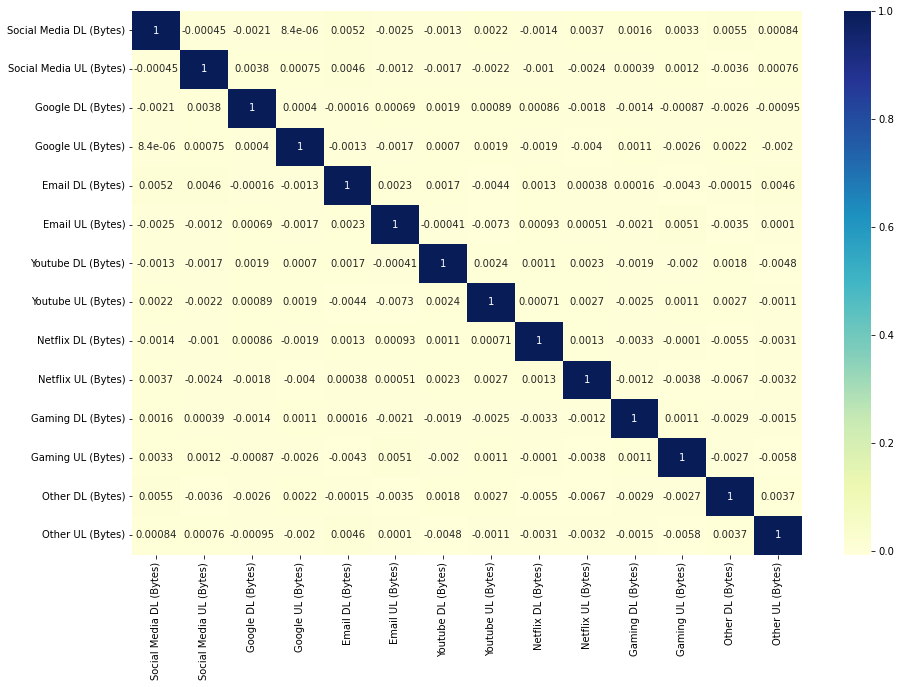

In [33]:
Variable_names = ['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
                  'Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
                  'Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)' ]

# correlation between data
corr =clean_data[Variable_names].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True)



In [34]:
# pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca(data, dimensions=3):
    scaling = StandardScaler()
    scaling.fit(data)
    scaled_data = scaling.transform(data)
    principal = PCA(n_components=dimensions)
    principal.fit(scaled_data)
    x = principal.transform(scaled_data)
    return x



In [35]:
# return pca data
user_pca_data = apply_pca(user_data, 3)
print(user_pca_data.shape)

(106352, 3)


### Task 2 - User Engagement analysis

In [36]:
# user_data.columns = information
user_data.columns

Index(['Dur. (ms).1', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Total DL+ Total UL', 'Decile'],
      dtype='object')

In [37]:
# selecting engagement metrics
engagement_metrics = user_data[['Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)']]
engagement_metrics.head(2)

Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                               
3.360100e+10    116720.0       842637466.0        36053108.0
3.360100e+10    181230.0       120755184.0        36104459.0

#### Task 2.1 - Based on the above submit python script and slide :


In [38]:
#Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric


In [39]:
#Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.
from sklearn.preprocessing import Normalizer

In [40]:
#pip install --upgrade numpy==1.21.4 

In [41]:
# creating clusters and visualizing
from sklearn.cluster import MiniBatchKMeans

def cluster_and_plot(data,k):
    norm = Normalizer()
    data_normalized = norm.fit_transform(data)
    clustering = MiniBatchKMeans(n_clusters=k, random_state=0).fit(data_normalized)
    clusters = clustering.predict(data_normalized)
    
    # adding clusters to data
    data['clusters'] = clusters
    labels = set(data['clusters'])
    
    # plotting clusters
    plt.figure(figsize=(15,10))
    sns.scatterplot(y='Dur. (ms)',x='Total DL (Bytes)',hue='clusters', palette=sns.color_palette('husl',k), data=data,legend='full')
    plt.show()
    return data
    

C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\CELINE\AppData\Local\Temp/ipykernel_23524/3631187752.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = clusters


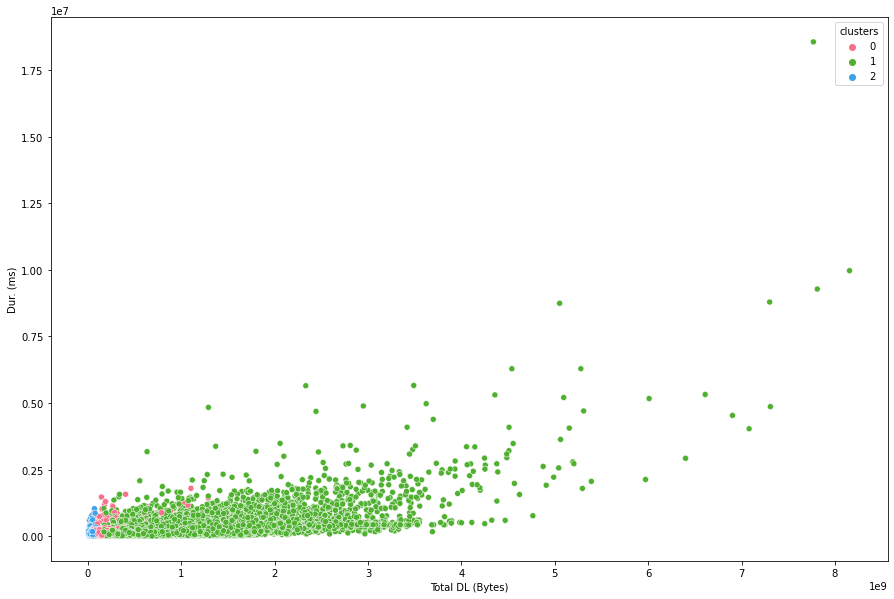

In [42]:
clustered_data = cluster_and_plot(engagement_metrics,3)
#for_dashboard['clustered_data'] = clustered_data

In [43]:
clustered_data.head()

Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  clusters
MSISDN/Number                                                         
3.360100e+10    116720.0      8.426375e+08        36053108.0         1
3.360100e+10    181230.0      1.207552e+08        36104459.0         0
3.360100e+10    134969.0      5.566597e+08        39306820.0         1
3.360101e+10     49878.0      4.019932e+08        20327526.0         1
3.360101e+10     37104.0      1.363130e+09        94280527.0         1

In [44]:
# minimum maximum and average of each cluster
clustered_data['clusters'].describe()

count    106352.000000
mean          0.910759
std           0.390121
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: clusters, dtype: float64

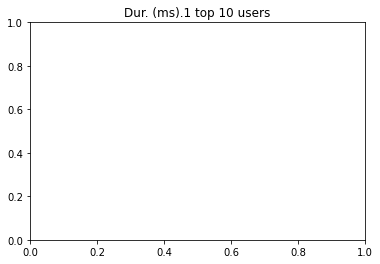

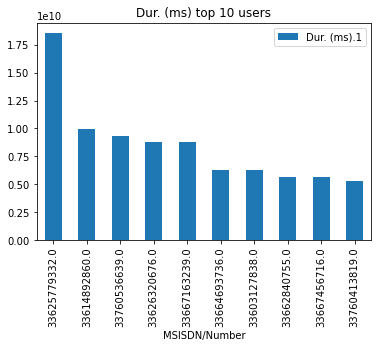

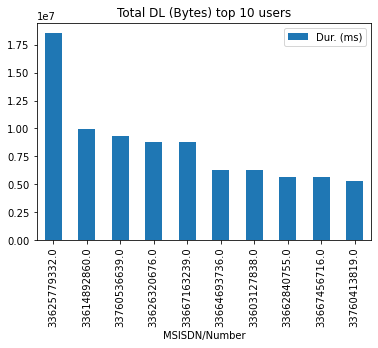

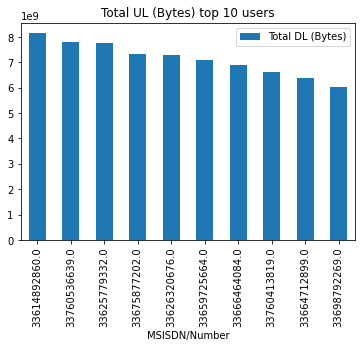

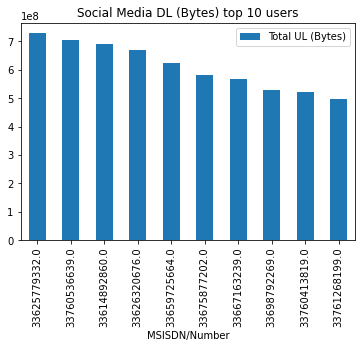

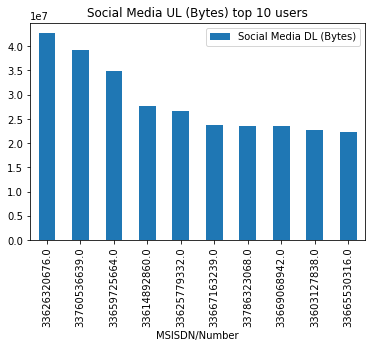

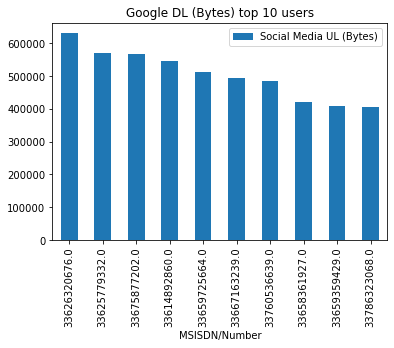

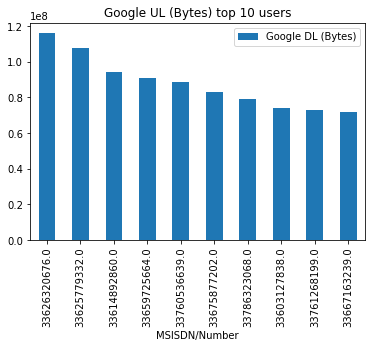

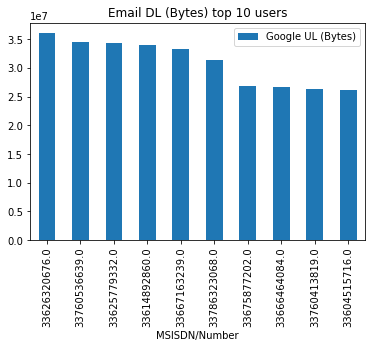

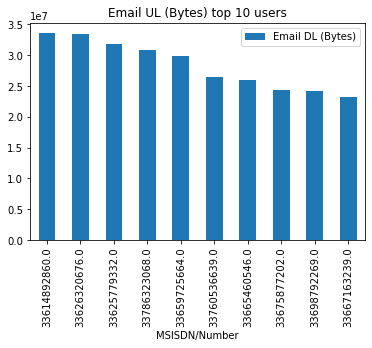

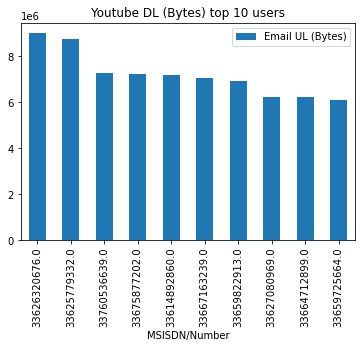

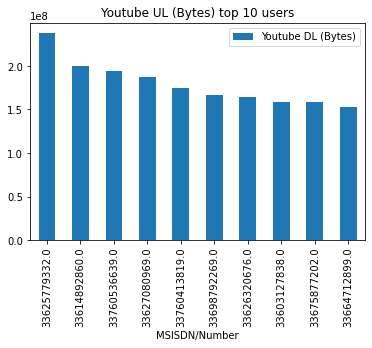

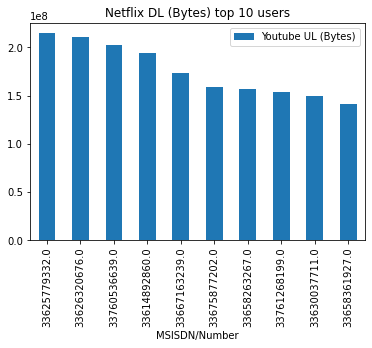

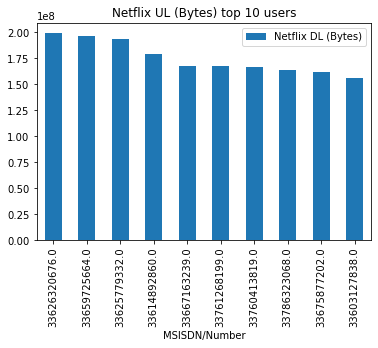

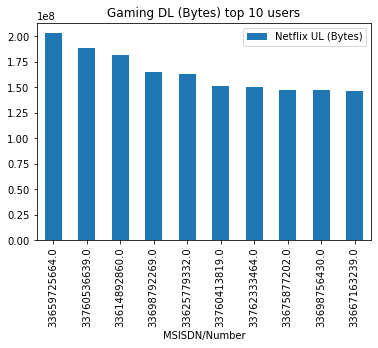

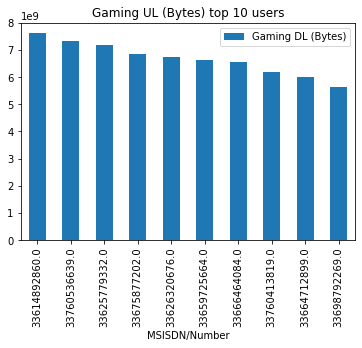

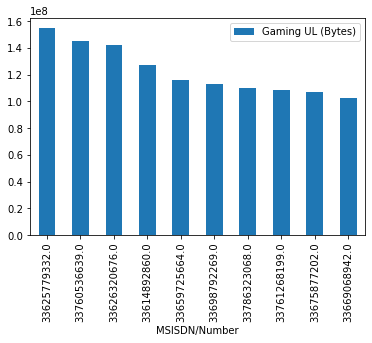

In [45]:
# user total traffic per application derive top 10 per application
for column in information:
    sorted = user_data.sort_values(column, axis=0, ascending=False, inplace=False)
    plt.title(column+' top 10 users')
    sorted[[column]].head(10).plot(kind='bar')

In [46]:
# top 3 most used applications
user_data.sum().sort_values(ascending=False)
# top 3 most used applications are Gaming DL, Youtube DL, Netflix DL

Total DL+ Total UL         7.355288e+13
Total DL (Bytes)           6.745287e+13
Gaming DL (Bytes)          6.261672e+13
Dur. (ms).1                1.559561e+13
Total UL (Bytes)           6.100010e+12
Youtube DL (Bytes)         1.725924e+12
Netflix DL (Bytes)         1.724890e+12
Youtube UL (Bytes)         1.633078e+12
Netflix UL (Bytes)         1.632083e+12
Gaming UL (Bytes)          1.229828e+12
Google DL (Bytes)          8.532308e+11
Google UL (Bytes)          3.050359e+11
Social Media DL (Bytes)    2.663016e+11
Email DL (Bytes)           2.657950e+11
Email UL (Bytes)           6.933435e+10
Dur. (ms)                  1.559552e+10
Social Media UL (Bytes)    4.883924e+09
Decile                     2.126880e+05
dtype: float64

In [47]:
# clustering in possible kmeans
# creating clusters and visualizing
from sklearn.cluster import MiniBatchKMeans

def cluster_and_plot_ks(data):
    norm = Normalizer()
    wcss = []
    data_normalized = norm.fit_transform(data)
    for k in range(1,11):
        kmeans = MiniBatchKMeans(n_clusters=k, init="k-means++")
        kmeans.fit(data_normalized)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
    plt.xlabel('k values')
    plt.ylabel('wcss')
    plt.show()
    return wcss

C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\User

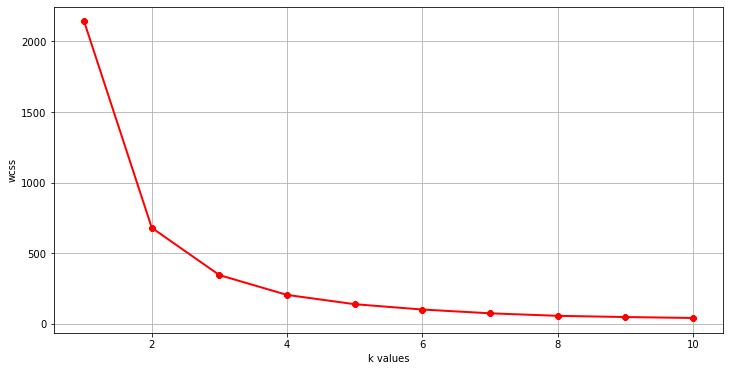

In [48]:
clustered_ks = cluster_and_plot_ks(engagement_metrics)
#for_dashboard['clustered_ks'] = clustered_ks

C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\CELINE\AppData\Local\Temp/ipykernel_23524/3631187752.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = clusters


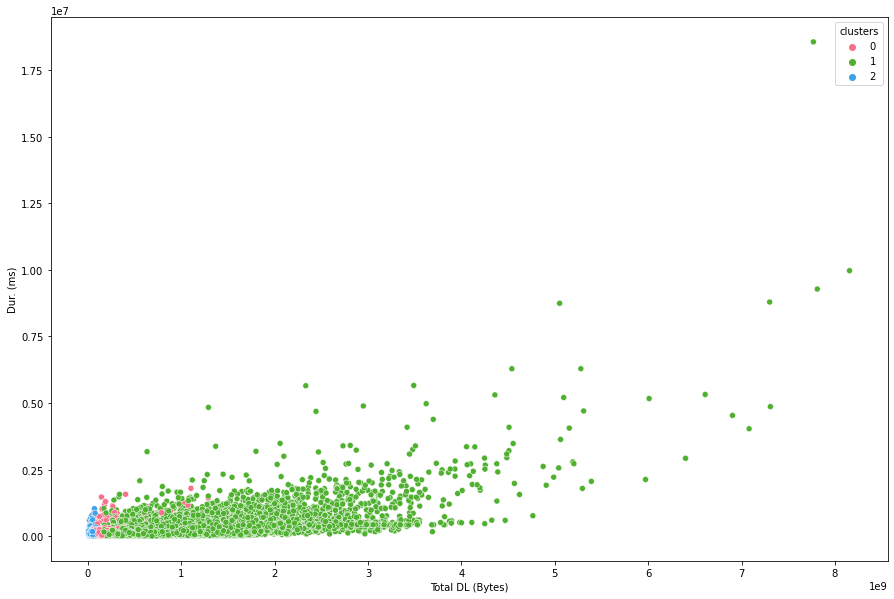

In [49]:
# the optimal k is 3 using elbow method
clustered_data = cluster_and_plot(engagement_metrics,3)
#for_dashboard['clustered_data'] = clustered_data

### TASK 3

In [50]:
all_user_data.columns.tolist()

['Bearer Id',
 'Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [51]:
import pandas as pd

class CleanData:
	def __init__(self, df:pd.DataFrame):
		self.df = df
		print('Automation in Action...!!!')

	def fill_with_zero(self, fill_columns=[])->pd.DataFrame:
		for columns in fill_columns:
			self.df[column].fillna(value=0, inplace=True)
		return self.df


	def fill_with_ffill(self, fill_columns)->pd.DataFrame:
		# fill null values with forward fill
		for column in fill_columns:
			self.df[column] = self.df[column].fillna(method='ffill')
		
		return self.df

	def fill_with_bfill(self, fill_columns)->pd.DataFrame:
		# fill null values with backward fill
		for column in fill_columns:
			self.df[column] = self.df[column].fillna(method='bfill')
		return self.df

	def fill_with_mean(self, fill_columns)->pd.DataFrame:
		# fill null values with mean
		for column in fill_columns:
			column_mean = self.df[column].mean()
			self.df[column].fillna(value=column_mean, inplace=True)
		return self.df

	def fill_with_mode(self, fill_columns)->pd.DataFrame:
		# fill null values with mode
		for column in fill_columns:
			column_mode = self.df[column].mode()[0]
			self.df[column].fillna(value=column_mode, inplace=True)
		return self.df

	def fill_with_median(self, fill_columns)->pd.DataFrame:
		# fill null values with mode
		for column in fill_columns:
			column_median = round(self.df[column].median(),1)
			self.df[column].fillna(value=column_median, inplace=True)
		return self.df

	def drop_rows(self, drop_in_columns=[])->pd.DataFrame:
		# drop rows for certain columns or all of them
		if drop_in_columns:
			self.df.dropna(subset=drop_in_columns, inplace=True)
		else:
			self.df.dropna(inplace=True)
		return self.df

	def drop_unwanted_column(self, unwanted_columns)->pd.DataFrame:
		# drop columns in the list unwanted_columns
		self.df.drop(unwanted_columns, axis=1, inplace=True)
		return self.df

	def drop_duplicate(self)->pd.DataFrame:
		# drop all duplicates
		self.df.drop_duplicates(inplace=True)
		return self.df

	def convert_to_datetime(self, datetime_columns)->pd.DataFrame:
		# convert a list of columns to datetime format
		for column in datetime_columns:
			self.df[column] = pd.to_datetime(self.df[column], format='%Y%m%d : %H%M%S')
		return self.df

	def treat_outliers_with_mode(self, fill_columns)->pd.DataFrame:
		# loop through columns
		# find min_threshol and max of column
		# replace max by mode, min by min
		for column in fill_columns:
			min_threshold, max_threshold = self.df[column].quantile([0.001,0.999])
			print(type(max_threshold))
			column_mode = self.df[column].mode()[0]
			column_min = self.df[column].min()
			# replacing ouliers
			self.df.loc[(self.df[column]>max_threshold),column] = column_mode
			self.df.loc[(self.df[column]<min_threshold),column] = column_min
		return self.df



In [52]:
outliers = CleanData(all_user_data)
columns_with_outliers = ['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
outliers.treat_outliers_with_mode(fill_columns=columns_with_outliers)

Automation in Action...!!!
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  \
MSISDN/Number                                                            
3.360100e+10   1.311450e+19     138.0   278.0   116720.0  2.082010e+14   
3.360100e+10   7.349880e+18     422.0   385.0   181230.0  2.082020e+14   
3.360100e+10   7.349880e+18      80.0   454.0   134969.0  2.082020e+14   
3.360101e+10   1.304240e+19     158.0   182.0    49878.0  2.082020e+14   
3.360101e+10   1.462771e+19    1297.0  1750.0    37104.0  4.164040e+14   
...                     ...       ...     ...        ...           ...   
3.379000e+10   1.304240e+19     829.0   517.0     8810.0  2.082010e+14   
3.379000e+10   1.311450e+19     846.0   505.0   140988.0  2.082010e+14   
3.197020e+12   7.277830e+18     345.0   670.0   877385.0  2.040810e+14   
3.370000e+14   7.349880e+18     811.0    12.0   253030.0  2.082100e+14   
8.823970e+14   7.277830e+18     259.0   459.0   869844.0  2.040470e+14   

               MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
MSISDN/Number                                                                  
3.360100e+10    3.360100e+10  8.627420e+13        46.000000         0.000000   
3.360100e+10    3.360100e+10  3.553260e+13        30.000000         1.000000   
3.360100e+10    3.360100e+10  3.561270e+13       105.958376        17.633438   
3.360101e+10    3.360101e+10  3.520490e+13        69.000000        15.000000   
3.360101e+10    6.720202e+10  7.061360e+13       114.000000         5.000000   
...                      ...           ...              ...              ...   
3.379000e+10    3.379000e+10  8.687980e+13        42.000000        10.000000   
3.379000e+10    3.379000e+10  3.529760e+13        34.000000         6.000000   
3.197020e+12    3.197020e+12  8.667580e+13       105.958376        17.633438   
3.370000e+14    3.370000e+14  8.619200e+13       105.958376        17.633438   
8.823970e+14    8.823970e+14  8.679620e+13       105.958376        17.633438   

               Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  \
MSISDN/Number                           ...                       
3.360100e+10                      37.0  ...          14900201.0   
3.360100e+10                      48.0  ...           5324251.0   
3.360100e+10                      48.0  ...           2137272.0   
3.360101e+10                     204.0  ...           4393123.0   
3.360101e+10                   40395.0  ...          10339971.0   
...                                ...  ...                 ...   
3.379000e+10                    9978.0  ...           8294310.0   
3.379000e+10                      68.0  ...           5596862.0   
3.197020e+12                       1.0  ...           9839889.0   
3.370000e+14                      11.0  ...          16690728.0   
8.823970e+14                       2.0  ...          18980320.0   

               Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
MSISDN/Number                                                               
3.360100e+10            6724347.0          10265105.0          16915876.0   
3.360100e+10            7107972.0            770569.0          10451194.0   
3.360100e+10           19196298.0          16525919.0           2827981.0   
3.360101e+10            2584198.0           1157362.0            784730.0   
3.360101e+10           31193031.0          24971647.0          24230077.0   
...                           ...                 ...                 ...   
3.379000e+10           18353533.0          14754741.0            147797.0   
3.379000e+10           14254710.0           6929961.0           1601099.0   
3.197020e+12            2120016.0          10340908.0          16251392.0   
3.370000e+14           20044212.0           9983678.0          20921364.0   
8.823970e+14           21960390.0          21621336.0           7224894.0   

               Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
MSISDN/Number                                                      

In [53]:
all_user_data = outliers.df
all_user_data.head()

Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  \
MSISDN/Number                                                            
3.360100e+10   1.311450e+19     138.0   278.0   116720.0  2.082010e+14   
3.360100e+10   7.349880e+18     422.0   385.0   181230.0  2.082020e+14   
3.360100e+10   7.349880e+18      80.0   454.0   134969.0  2.082020e+14   
3.360101e+10   1.304240e+19     158.0   182.0    49878.0  2.082020e+14   
3.360101e+10   1.462771e+19    1297.0  1750.0    37104.0  4.164040e+14   

               MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
MSISDN/Number                                                                  
3.360100e+10    3.360100e+10  8.627420e+13        46.000000         0.000000   
3.360100e+10    3.360100e+10  3.553260e+13        30.000000         1.000000   
3.360100e+10    3.360100e+10  3.561270e+13       105.958376        17.633438   
3.360101e+10    3.360101e+10  3.520490e+13        69.000000        15.000000   
3.360101e+10    6.720202e+10  7.061360e+13       114.000000         5.000000   

               Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  \
MSISDN/Number                           ...                       
3.360100e+10                      37.0  ...          14900201.0   
3.360100e+10                      48.0  ...           5324251.0   
3.360100e+10                      48.0  ...           2137272.0   
3.360101e+10                     204.0  ...           4393123.0   
3.360101e+10                   40395.0  ...          10339971.0   

               Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
MSISDN/Number                                                               
3.360100e+10            6724347.0          10265105.0          16915876.0   
3.360100e+10            7107972.0            770569.0          10451194.0   
3.360100e+10           19196298.0          16525919.0           2827981.0   
3.360101e+10            2584198.0           1157362.0            784730.0   
3.360101e+10           31193031.0          24971647.0          24230077.0   

               Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
MSISDN/Number                                                           
3.360100e+10        8.110911e+08          1367528.0       377096990.0   
3.360100e+10        1.050353e+08         14714780.0       279557701.0   
3.360100e+10        5.290685e+08          9759228.0       495086501.0   
3.360101e+10        3.880748e+08          3051292.0        25248001.0   
3.360101e+10        1.308981e+09          5816727.0       777643713.0   

               Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
MSISDN/Number                                                        
3.360100e+10          9473882.0        36053108.0      8.426375e+08  
3.360100e+10          2152370.0        36104459.0      1.207552e+08  
3.360100e+10          6607171.0        39306820.0      5.566597e+08  
3.360101e+10         10031701.0        20327526.0      4.019932e+08  
3.360101e+10         27160771.0        94280527.0      1.363130e+09  

[5 rows x 42 columns]

In [54]:
# top 10 bottom 10 skipped
def top_bottom_frequent(data, columns, count=10):
    for column in columns:
        # top 
        data[column].sort_values(column,ascending=False, axis=0)
        # bottom
        data[column].sort_values(column, axis=0, inplace=False, ascending=True).reset_index(drop=False)[:count]
        # freq
        data[column].value_counts()[:10]

columns = ['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)','Avg RTT DL (ms)', 'Avg RTT UL (ms)']
# top_bottom_frequent(all_user_data, columns, 10)

In [55]:
# creating clusters and visualizing
from sklearn.cluster import MiniBatchKMeans

def cluster_and_plot_experience(data,k):
    norm = Normalizer()
    data_normalized = norm.fit_transform(data)
    clustering = MiniBatchKMeans(n_clusters=k, random_state=0).fit(data_normalized)
    clusters = clustering.predict(data_normalized)
    
    # adding clusters to data
    data['experience'] = clusters
    labels = set(data['experience'])
    
    # plotting clusters
    plt.figure(figsize=(15,10))
#     sns.scatterplot(x='Dur. (ms)',y='DL TP < 50 Kbps (%)',hue='experience', palette=sns.color_palette('husl',k), data=data,legend='full')
#     plt.show()
    return data

In [56]:
# experience metrics
experience_metrics = all_user_data[['Dur. (ms)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)','Avg RTT DL (ms)', 'Avg RTT UL (ms)']]
experience_metrics.head()

Dur. (ms)  DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
MSISDN/Number                                                                   
3.360100e+10    116720.0                100.0                             0.0   
3.360100e+10    181230.0                100.0                             0.0   
3.360100e+10    134969.0                100.0                             0.0   
3.360101e+10     49878.0                100.0                             0.0   
3.360101e+10     37104.0                162.0                            30.0   

               250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  \
MSISDN/Number                                                      
3.360100e+10                             0.0                 0.0   
3.360100e+10                             0.0                 0.0   
3.360100e+10                             0.0                 0.0   
3.360101e+10                             0.0                 0.0   
3.360101e+10                             2.0                 4.0   

               UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
MSISDN/Number                                                       
3.360100e+10                 100.0                            0.0   
3.360100e+10                 100.0                            0.0   
3.360100e+10                 100.0                            0.0   
3.360101e+10                 100.0                            0.0   
3.360101e+10                 183.0                           15.0   

               50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  \
MSISDN/Number                                                         
3.360100e+10                              0.0                   0.0   
3.360100e+10                              0.0                   0.0   
3.360100e+10                              0.0                   0.0   
3.360101e+10                              0.0                   0.0   
3.360101e+10                              0.0                   0.0   

               TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
MSISDN/Number                                                     
3.360100e+10                        1330.0                100.0   
3.360100e+10                        1330.0                100.0   
3.360100e+10                        1330.0                100.0   
3.360101e+10                        1330.0                100.0   
3.360101e+10                       22532.0                162.0   

               Avg RTT DL (ms)  Avg RTT UL (ms)  
MSISDN/Number                                    
3.360100e+10         46.000000         0.000000  
3.360100e+10         30.000000         1.000000  
3.360100e+10        105.958376        17.633438  
3.360101e+10         69.000000        15.000000  
3.360101e+10        114.000000         5.000000

C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\User

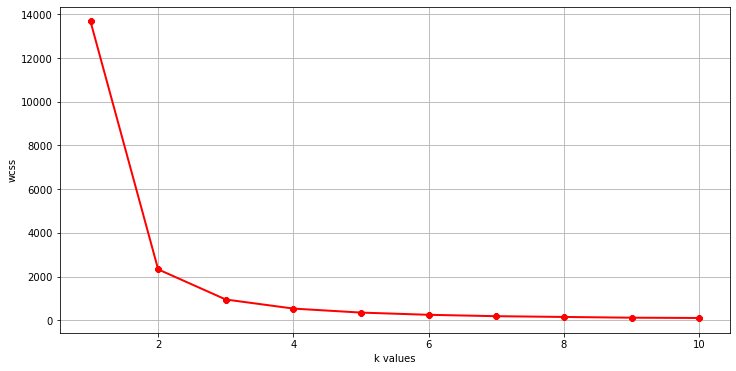

[13668.492924541297,
 2333.849470988237,
 955.6016968677313,
 540.2508760963342,
 357.21500424407486,
 255.9145206778981,
 192.46152115300276,
 157.7063049825121,
 123.82240994250138,
 110.97168096305273]

In [57]:
# task 3.4 experience clusters
cluster_and_plot_ks(experience_metrics)

In [58]:
user_experience_data = cluster_and_plot_experience(experience_metrics,3)
user_experience_data.groupby('experience').count()

C:\Users\CELINE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\CELINE\AppData\Local\Temp/ipykernel_23524/70098575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['experience'] = clusters


Dur. (ms)  DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
experience                                                                   
0               84907                84907                           84907   
1               10398                10398                           10398   
2               11047                11047                           11047   

            250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  \
experience                                                      
0                                   84907               84907   
1                                   10398               10398   
2                                   11047               11047   

            UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
experience                                                       
0                         84907                          84907   
1                         10398                          10398   
2                         11047                          11047   

            50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  \
experience                                                         
0                                    84907                 84907   
1                                    10398                 10398   
2                                    11047                 11047   

            TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  Avg RTT DL (ms)  \
experience                                                                      
0                                 84907                84907            84907   
1                                 10398                10398            10398   
2                                 11047                11047            11047   

            Avg RTT UL (ms)  
experience                   
0                     84907  
1                     10398  
2                     11047

<Figure size 1080x720 with 0 Axes>

In [59]:
user_data.head(2)

Dur. (ms).1  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
MSISDN/Number                                                               
3.360100e+10   116720140.0   116720.0       842637466.0        36053108.0   
3.360100e+10   181230963.0   181230.0       120755184.0        36104459.0   

               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.360100e+10                 2206504.0                  25631.0   
3.360100e+10                 2598548.0                  62017.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
3.360100e+10           3337123.0          1051882.0          837400.0   
3.360100e+10           4197697.0          1137166.0         2828821.0   

               Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
MSISDN/Number                                                             
3.360100e+10           493962.0          14900201.0           6724347.0   
3.360100e+10           478960.0           5324251.0           7107972.0   

               Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
MSISDN/Number                                                              
3.360100e+10           10265105.0          16915876.0        811091133.0   
3.360100e+10             770569.0          10451194.0        105035298.0   

               Gaming UL (Bytes)  Total DL+ Total UL  Decile  
MSISDN/Number                                                 
3.360100e+10           1367528.0         878690574.0       2  
3.360100e+10          14714780.0         156859643.0       3

In [60]:
# user data dataframe
user_data.head()
clustered_data.head()
user_experience_data.head()
all_user_data['Decile'] = user_data['Decile']
all_user_data['Cluster Engagement'] = clustered_data['clusters']
all_user_data['Cluster Experience'] = user_experience_data['experience']
all_user_data['Total DL + UL'] = user_data['Total DL+ Total UL']
all_user_data.head()

Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  \
MSISDN/Number                                                            
3.360100e+10   1.311450e+19     138.0   278.0   116720.0  2.082010e+14   
3.360100e+10   7.349880e+18     422.0   385.0   181230.0  2.082020e+14   
3.360100e+10   7.349880e+18      80.0   454.0   134969.0  2.082020e+14   
3.360101e+10   1.304240e+19     158.0   182.0    49878.0  2.082020e+14   
3.360101e+10   1.462771e+19    1297.0  1750.0    37104.0  4.164040e+14   

               MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
MSISDN/Number                                                                  
3.360100e+10    3.360100e+10  8.627420e+13        46.000000         0.000000   
3.360100e+10    3.360100e+10  3.553260e+13        30.000000         1.000000   
3.360100e+10    3.360100e+10  3.561270e+13       105.958376        17.633438   
3.360101e+10    3.360101e+10  3.520490e+13        69.000000        15.000000   
3.360101e+10    6.720202e+10  7.061360e+13       114.000000         5.000000   

               Avg Bearer TP DL (kbps)  ...  Gaming DL (Bytes)  \
MSISDN/Number                           ...                      
3.360100e+10                      37.0  ...       8.110911e+08   
3.360100e+10                      48.0  ...       1.050353e+08   
3.360100e+10                      48.0  ...       5.290685e+08   
3.360101e+10                     204.0  ...       3.880748e+08   
3.360101e+10                   40395.0  ...       1.308981e+09   

               Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
MSISDN/Number                                                          
3.360100e+10           1367528.0       377096990.0         9473882.0   
3.360100e+10          14714780.0       279557701.0         2152370.0   
3.360100e+10           9759228.0       495086501.0         6607171.0   
3.360101e+10           3051292.0        25248001.0        10031701.0   
3.360101e+10           5816727.0       777643713.0        27160771.0   

               Total UL (Bytes)  Total DL (Bytes)  Decile  Cluster Engagement  \
MSISDN/Number                                                                   
3.360100e+10         36053108.0      8.426375e+08       2                   1   
3.360100e+10         36104459.0      1.207552e+08       3                   0   
3.360100e+10         39306820.0      5.566597e+08       3                   1   
3.360101e+10         20327526.0      4.019932e+08       0                   1   
3.360101e+10         94280527.0      1.363130e+09       0                   1   

               Cluster Experience  Total DL + UL  
MSISDN/Number                                     
3.360100e+10                    0   8.786906e+08  
3.360100e+10                    0   1.568596e+08  
3.360100e+10                    0   5.959665e+08  
3.360101e+10                    0   4.223207e+08  
3.360101e+10                    2   1.457411e+09  

[5 rows x 46 columns]

In [61]:
# save all user data
all_user_data.to_csv('../Data/all_user_data.csv')

In [62]:
# # finding user engagement and experience score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

engagement = all_user_data[['Cluster Engagement','Cluster Experience','Total DL + UL' ]]
origin = np.zeros((2,1))
engagement_scores = []
experience_scores = []

for i in range(len(engagement)):
    engage = engagement.iloc[i,[0,2]].values.tolist()
    experience = engagement.iloc[i,[1,2]].values.tolist()
    euclidean_engagement = np.sqrt(np.sum(np.square(engage-origin)))
    euclidean_experience = np.sqrt(np.sum(np.square(experience-origin)))
    engagement_scores.append(euclidean_engagement)
    experience_scores.append(euclidean_experience)

print(len(engagement_scores))
print(len(experience_scores))

106352
106352


In [63]:
# adding scores to dataset
all_user_data['Engagement Score'] = engagement_scores
all_user_data['Experience Score'] = experience_scores
all_user_data.head()

Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  \
MSISDN/Number                                                            
3.360100e+10   1.311450e+19     138.0   278.0   116720.0  2.082010e+14   
3.360100e+10   7.349880e+18     422.0   385.0   181230.0  2.082020e+14   
3.360100e+10   7.349880e+18      80.0   454.0   134969.0  2.082020e+14   
3.360101e+10   1.304240e+19     158.0   182.0    49878.0  2.082020e+14   
3.360101e+10   1.462771e+19    1297.0  1750.0    37104.0  4.164040e+14   

               MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
MSISDN/Number                                                                  
3.360100e+10    3.360100e+10  8.627420e+13        46.000000         0.000000   
3.360100e+10    3.360100e+10  3.553260e+13        30.000000         1.000000   
3.360100e+10    3.360100e+10  3.561270e+13       105.958376        17.633438   
3.360101e+10    3.360101e+10  3.520490e+13        69.000000        15.000000   
3.360101e+10    6.720202e+10  7.061360e+13       114.000000         5.000000   

               Avg Bearer TP DL (kbps)  ...  Other DL (Bytes)  \
MSISDN/Number                           ...                     
3.360100e+10                      37.0  ...       377096990.0   
3.360100e+10                      48.0  ...       279557701.0   
3.360100e+10                      48.0  ...       495086501.0   
3.360101e+10                     204.0  ...        25248001.0   
3.360101e+10                   40395.0  ...       777643713.0   

               Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  Decile  \
MSISDN/Number                                                                 
3.360100e+10          9473882.0        36053108.0      8.426375e+08       2   
3.360100e+10          2152370.0        36104459.0      1.207552e+08       3   
3.360100e+10          6607171.0        39306820.0      5.566597e+08       3   
3.360101e+10         10031701.0        20327526.0      4.019932e+08       0   
3.360101e+10         27160771.0        94280527.0      1.363130e+09       0   

               Cluster Engagement  Cluster Experience  Total DL + UL  \
MSISDN/Number                                                          
3.360100e+10                    1                   0   8.786906e+08   
3.360100e+10                    0                   0   1.568596e+08   
3.360100e+10                    1                   0   5.959665e+08   
3.360101e+10                    1                   0   4.223207e+08   
3.360101e+10                    1                   2   1.457411e+09   

               Engagement Score  Experience Score  
MSISDN/Number                                      
3.360100e+10       1.242656e+09      1.242656e+09  
3.360100e+10       2.218330e+08      2.218330e+08  
3.360100e+10       8.428239e+08      8.428239e+08  
3.360101e+10       5.972517e+08      5.972517e+08  
3.360101e+10       2.061090e+09      2.061090e+09  

[5 rows x 48 columns]

In [64]:
# user satisfaction score
all_user_data['Satisfaction Score'] = (all_user_data['Engagement Score']+all_user_data['Experience Score'])/2
all_user_data.head()

Bearer Id  Start ms  End ms  Dur. (ms)          IMSI  \
MSISDN/Number                                                            
3.360100e+10   1.311450e+19     138.0   278.0   116720.0  2.082010e+14   
3.360100e+10   7.349880e+18     422.0   385.0   181230.0  2.082020e+14   
3.360100e+10   7.349880e+18      80.0   454.0   134969.0  2.082020e+14   
3.360101e+10   1.304240e+19     158.0   182.0    49878.0  2.082020e+14   
3.360101e+10   1.462771e+19    1297.0  1750.0    37104.0  4.164040e+14   

               MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
MSISDN/Number                                                                  
3.360100e+10    3.360100e+10  8.627420e+13        46.000000         0.000000   
3.360100e+10    3.360100e+10  3.553260e+13        30.000000         1.000000   
3.360100e+10    3.360100e+10  3.561270e+13       105.958376        17.633438   
3.360101e+10    3.360101e+10  3.520490e+13        69.000000        15.000000   
3.360101e+10    6.720202e+10  7.061360e+13       114.000000         5.000000   

               Avg Bearer TP DL (kbps)  ...  Other UL (Bytes)  \
MSISDN/Number                           ...                     
3.360100e+10                      37.0  ...         9473882.0   
3.360100e+10                      48.0  ...         2152370.0   
3.360100e+10                      48.0  ...         6607171.0   
3.360101e+10                     204.0  ...        10031701.0   
3.360101e+10                   40395.0  ...        27160771.0   

               Total UL (Bytes)  Total DL (Bytes)  Decile  Cluster Engagement  \
MSISDN/Number                                                                   
3.360100e+10         36053108.0      8.426375e+08       2                   1   
3.360100e+10         36104459.0      1.207552e+08       3                   0   
3.360100e+10         39306820.0      5.566597e+08       3                   1   
3.360101e+10         20327526.0      4.019932e+08       0                   1   
3.360101e+10         94280527.0      1.363130e+09       0                   1   

               Cluster Experience  Total DL + UL  Engagement Score  \
MSISDN/Number                                                        
3.360100e+10                    0   8.786906e+08      1.242656e+09   
3.360100e+10                    0   1.568596e+08      2.218330e+08   
3.360100e+10                    0   5.959665e+08      8.428239e+08   
3.360101e+10                    0   4.223207e+08      5.972517e+08   
3.360101e+10                    2   1.457411e+09      2.061090e+09   

               Experience Score  Satisfaction Score  
MSISDN/Number                                        
3.360100e+10       1.242656e+09        1.242656e+09  
3.360100e+10       2.218330e+08        2.218330e+08  
3.360100e+10       8.428239e+08        8.428239e+08  
3.360101e+10       5.972517e+08        5.972517e+08  
3.360101e+10       2.061090e+09        2.061090e+09  

[5 rows x 49 columns]

<AxesSubplot:>

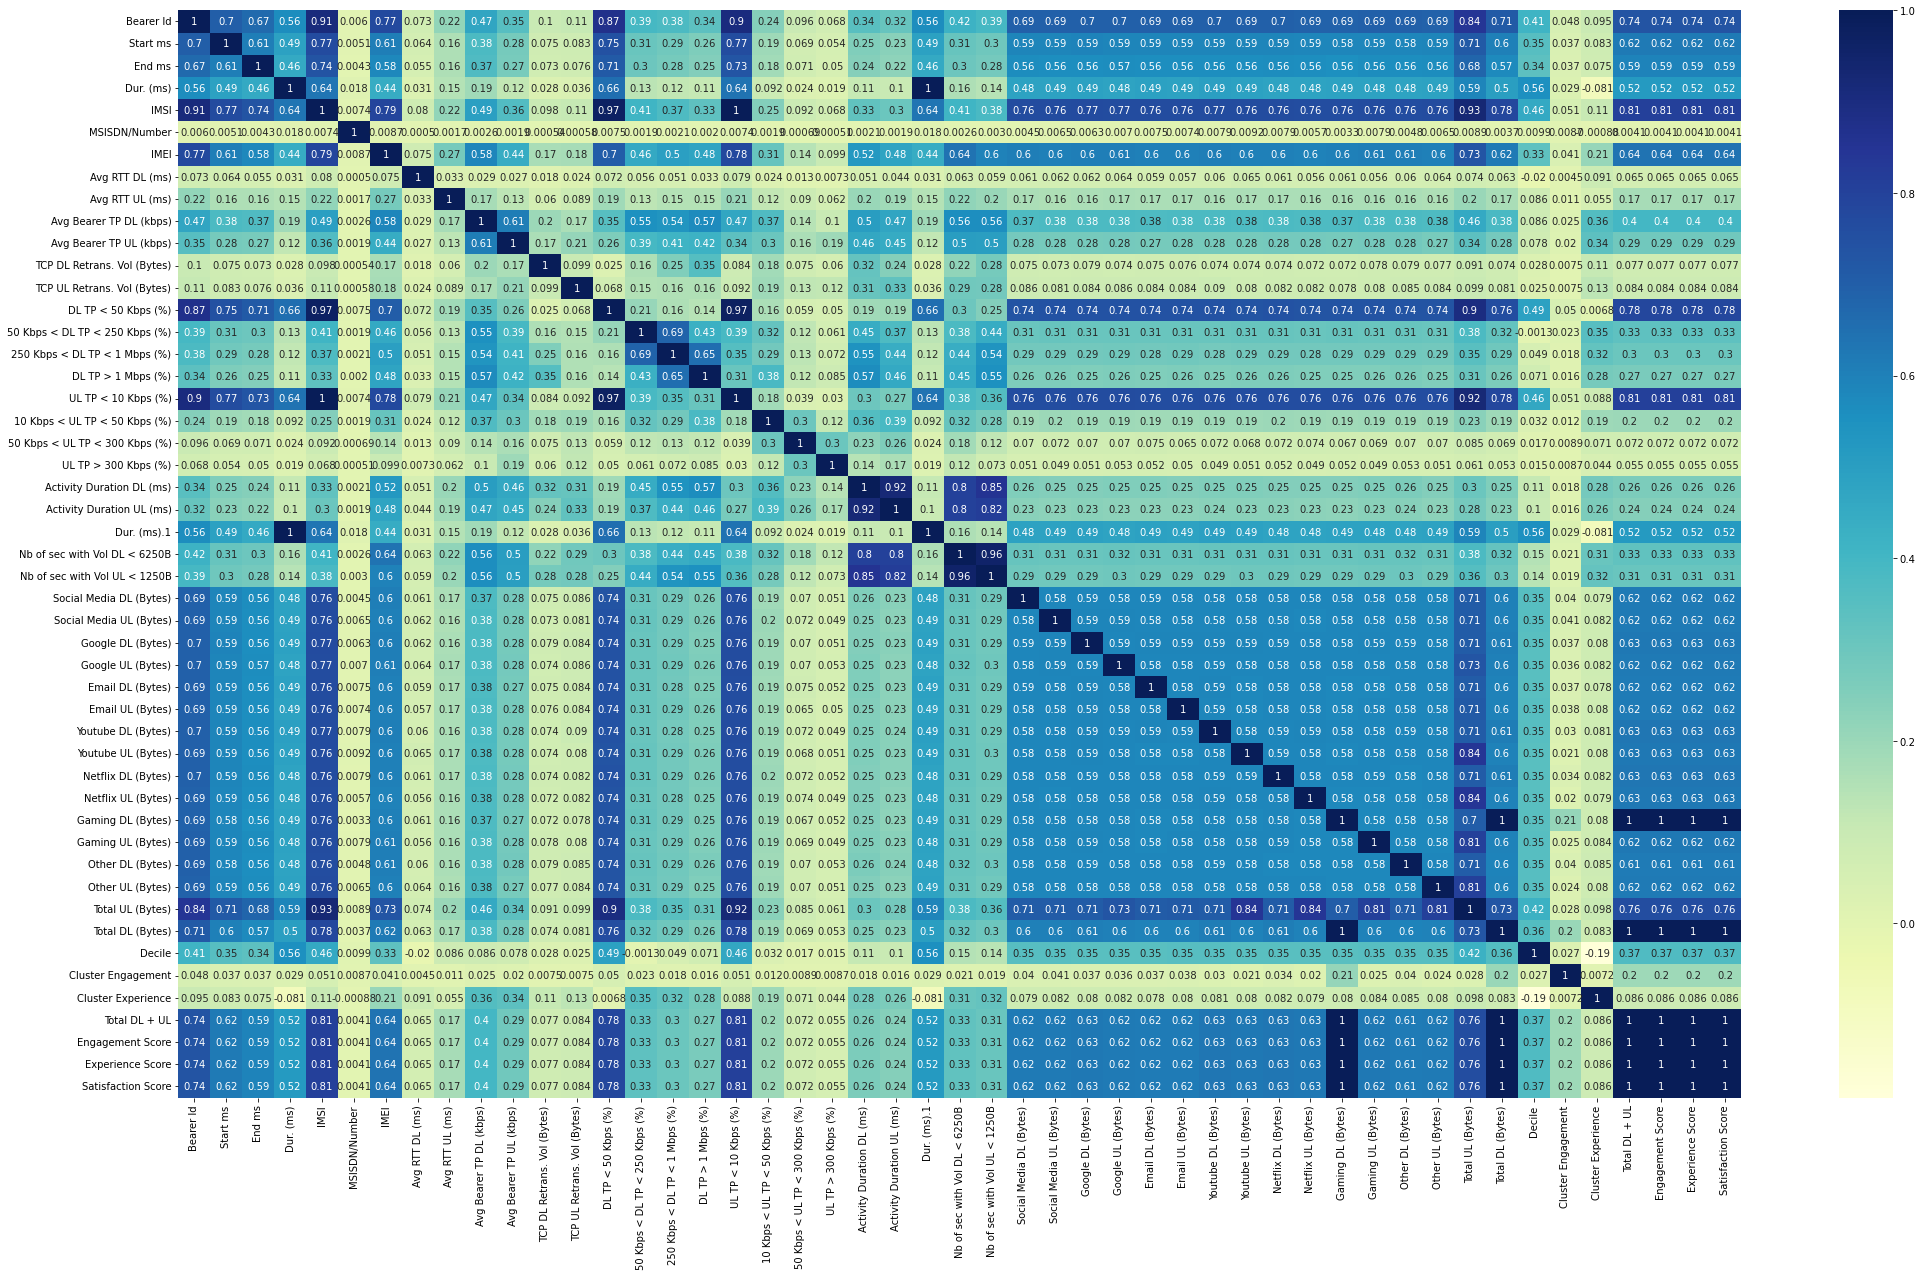

In [65]:
# correlation
corr = all_user_data.corr()
plt.figure(figsize=(35,20))
sns.heatmap(corr, cmap='YlGnBu', annot=True)

In [66]:
# user data columns for prediction
all_user_data.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL

In [67]:
# needed columns for prediction
data_for_prediction = all_user_data[['Dur. (ms)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)','Avg RTT DL (ms)', 'Avg RTT UL (ms)','Total DL (Bytes)','Total UL (Bytes)','Total DL + UL','Satisfaction Score']]
data_for_prediction.head()

Dur. (ms)  DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
MSISDN/Number                                                                   
3.360100e+10    116720.0                100.0                             0.0   
3.360100e+10    181230.0                100.0                             0.0   
3.360100e+10    134969.0                100.0                             0.0   
3.360101e+10     49878.0                100.0                             0.0   
3.360101e+10     37104.0                162.0                            30.0   

               250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  \
MSISDN/Number                                                      
3.360100e+10                             0.0                 0.0   
3.360100e+10                             0.0                 0.0   
3.360100e+10                             0.0                 0.0   
3.360101e+10                             0.0                 0.0   
3.360101e+10                             2.0                 4.0   

               UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
MSISDN/Number                                                       
3.360100e+10                 100.0                            0.0   
3.360100e+10                 100.0                            0.0   
3.360100e+10                 100.0                            0.0   
3.360101e+10                 100.0                            0.0   
3.360101e+10                 183.0                           15.0   

               50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  \
MSISDN/Number                                                         
3.360100e+10                              0.0                   0.0   
3.360100e+10                              0.0                   0.0   
3.360100e+10                              0.0                   0.0   
3.360101e+10                              0.0                   0.0   
3.360101e+10                              0.0                   0.0   

               TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
MSISDN/Number                                                     
3.360100e+10                        1330.0                100.0   
3.360100e+10                        1330.0                100.0   
3.360100e+10                        1330.0                100.0   
3.360101e+10                        1330.0                100.0   
3.360101e+10                       22532.0                162.0   

               Avg RTT DL (ms)  Avg RTT UL (ms)  Total DL (Bytes)  \
MSISDN/Number                                                       
3.360100e+10         46.000000         0.000000      8.426375e+08   
3.360100e+10         30.000000         1.000000      1.207552e+08   
3.360100e+10        105.958376        17.633438      5.566597e+08   
3.360101e+10         69.000000        15.000000      4.019932e+08   
3.360101e+10        114.000000         5.000000      1.363130e+09   

               Total UL (Bytes)  Total DL + UL  Satisfaction Score  
MSISDN/Number                                                       
3.360100e+10         36053108.0   8.786906e+08        1.242656e+09  
3.360100e+10         36104459.0   1.568596e+08        2.218330e+08  
3.360100e+10         39306820.0   5.959665e+08        8.428239e+08  
3.360101e+10         20327526.0   4.223207e+08        5.972517e+08  
3.360101e+10         94280527.0   1.457411e+09        2.061090e+09

In [68]:
# building regression model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# x and y
x = data_for_prediction[['Dur. (ms)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)','Avg RTT DL (ms)', 'Avg RTT UL (ms)','Total DL (Bytes)','Total UL (Bytes)','Total DL + UL']]
y = data_for_prediction['Satisfaction Score']

# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0)
pipeline = Pipeline([('scaler',StandardScaler()),('linear regression', LinearRegression())])
pipeline.fit(xtrain,ytrain)
pipeline.score(xtest,ytest)

1.0

In [69]:
# aggregate data with scores
average_engagement_score = all_user_data.groupby(['Cluster Engagement'])['Satisfaction Score'].mean()

In [70]:
average_experience_score = all_user_data.groupby(['Cluster Experience'])['Satisfaction Score'].mean()

In [71]:
final_table = all_user_data[['Cluster Engagement','Cluster Experience','Satisfaction Score']]
final_table.head()

Cluster Engagement  Cluster Experience  Satisfaction Score
MSISDN/Number                                                            
3.360100e+10                    1                   0        1.242656e+09
3.360100e+10                    0                   0        2.218330e+08
3.360100e+10                    1                   0        8.428239e+08
3.360101e+10                    1                   0        5.972517e+08
3.360101e+10                    1                   2        2.061090e+09

In [72]:
# export data to csv
final_table.to_csv('../Data/experience_data.csv')

In [73]:
# saving model
import pickle
pickle.dump(pipeline, open('../Models/satisfaction_model.pkl','wb'))